<a href="https://colab.research.google.com/github/catminh110/LabCPV301/blob/main/Lab13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

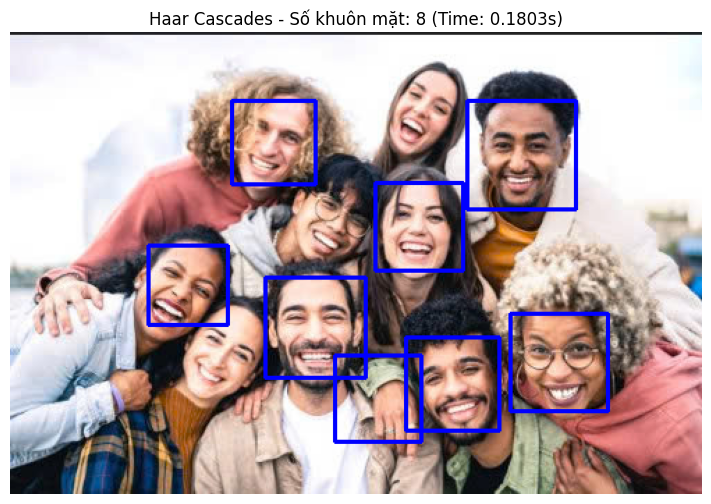

In [ ]:
import cv2
import matplotlib.pyplot as plt
import time

# Load Haar Cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

def detect_faces_haar(image_path):
    """
    Phát hiện khuôn mặt trong ảnh bằng Haar Cascades.
    """
    # Đọc ảnh và chuyển sang ảnh xám
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read image at {image_path}")
        return None, 0, 0 # Return indicating failure

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Bắt đầu đo thời gian
    start_time = time.time()

    # Phát hiện khuôn mặt
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Đo thời gian hoàn tất
    end_time = time.time()
    detection_time = end_time - start_time

    # Vẽ hình chữ nhật xung quanh khuôn mặt
    img_copy = img.copy() # Draw on a copy to keep original clean if needed
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255, 0, 0), 2) # Use Blue color as in image

    # Chuyển ảnh sang RGB để hiển thị bằng Matplotlib
    img_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

    return img_rgb, len(faces), detection_time

image_path = "/content/anhnguoi.jpg" # Ensure this path is correct
result_img, num_faces, process_time = detect_faces_haar(image_path)

# Check if detection was successful before plotting
if result_img is not None:
    # Hiển thị kết quả
    plt.figure(figsize=(10, 6))
    plt.imshow(result_img)
    plt.axis("off")
    plt.title(f"Haar Cascades - Số khuôn mặt: {num_faces} (Time: {process_time:.4f}s)") # Added time info
    plt.show()
    # print(f"Detection Time: {process_time:.4f} seconds") # Optional: print time
else:
    print("Face detection failed.")

In [ ]:
!pip install tensorflow mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.3 MB/s eta 0:00:00


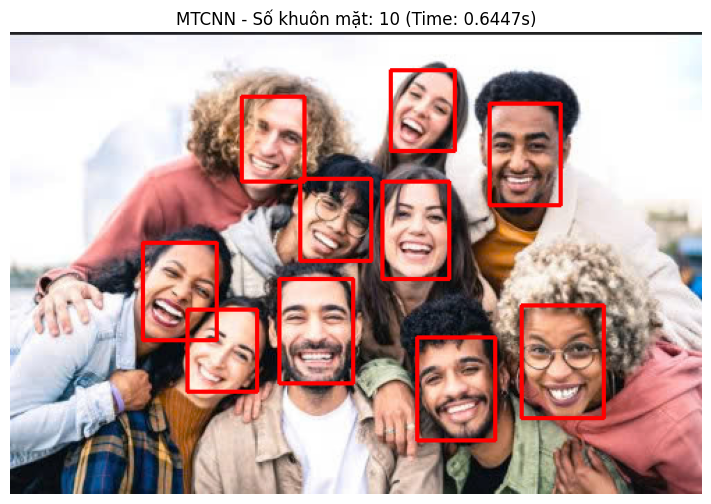

In [ ]:
import cv2
import matplotlib.pyplot as plt
import time
# Ensure 'mtcnn' library is installed: pip install mtcnn
from mtcnn import MTCNN

# Khởi tạo model MTCNN
detector = MTCNN()

def detect_faces_mtcnn(image_path):
    """
    Phát hiện khuôn mặt trong ảnh bằng MTCNN.
    """
    # Đọc ảnh và chuyển sang RGB (MTCNN yêu cầu ảnh RGB)
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read image at {image_path}")
        return None, 0, 0

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Bắt đầu đo thời gian
    start_time = time.time()

    # Phát hiện khuôn mặt
    faces = detector.detect_faces(img_rgb)

    # Đo thời gian hoàn tất
    end_time = time.time()
    detection_time = end_time - start_time

    # Vẽ hình chữ nhật xung quanh khuôn mặt (trên ảnh RGB)
    img_rgb_copy = img_rgb.copy() # Draw on a copy
    for face in faces:
        x, y, w, h = face["box"]
        # Ensure coordinates are positive
        x, y = abs(x), abs(y)
        cv2.rectangle(img_rgb_copy, (x, y), (x + w, y + h), (255, 0, 0), 2) # Blue rectangle as per image

    return img_rgb_copy, len(faces), detection_time

image_path = "/content/anhnguoi.jpg" # Ensure this path is correct
result_img, num_faces, process_time = detect_faces_mtcnn(image_path)

if result_img is not None:
    # Hiển thị kết quả
    plt.figure(figsize=(10, 6))
    plt.imshow(result_img)
    plt.axis("off")
    plt.title(f"MTCNN - Số khuôn mặt: {num_faces} (Time: {process_time:.4f}s)") # Added time info
    plt.show()
    # print(f"Detection Time: {process_time:.4f} seconds") # Optional: print time
else:
    print("Face detection failed.")

--2025-03-25 23:27:35--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10666211 (10M) [application/octet-stream]
Saving to: ‘res10_300x300_ssd_iter_140000.caffemodel’

res10_300x300_ssd_i 100%[===================>]  10.17M  --.-KB/s    in 0.1s    

2025-03-25 23:27:35 (92.8 MB/s) - ‘res10_300x300_ssd_iter_140000.caffemodel’ saved [10666211/10666211]

--2025-03-25 23:27:35--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.

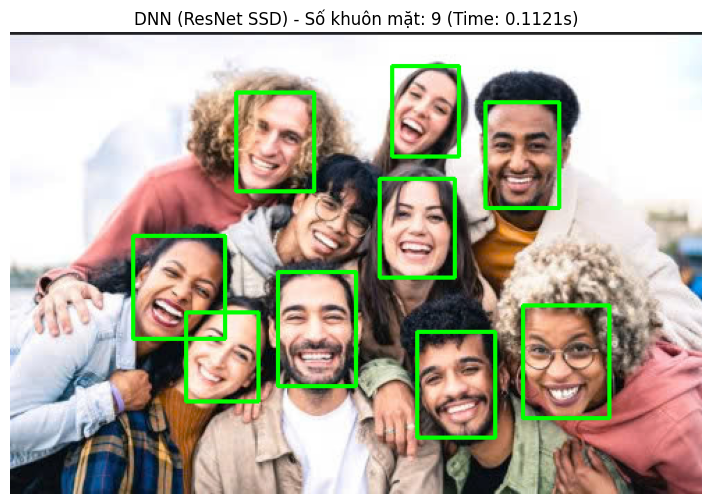

In [ ]:
import cv2
import time
import matplotlib.pyplot as plt
import numpy as np


!wget -O res10_300x300_ssd_iter_140000.caffemodel "https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel"
!wget -O deploy.prototxt "https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt"

# Load the model
try:
    net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "res10_300x300_ssd_iter_140000.caffemodel")
except cv2.error as e:
    print(f"Error loading Caffe model: {e}")
    print("Please ensure 'deploy.prototxt' and 'res10_300x300_ssd_iter_140000.caffemodel' are present.")
    net = None

def detect_faces_dnn(image_path, conf_threshold=0.5):
    """
    Phát hiện khuôn mặt trong ảnh bằng DNN (ResNet-SSD).
    """
    if net is None:
        print("Model not loaded. Cannot perform detection.")
        return None, 0, 0

    # Đọc ảnh
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read image at {image_path}")
        return None, 0, 0

    (h, w) = img.shape[:2]

    # Tiền xử lý ảnh cho DNN
    # Standard parameters for this model
    blob = cv2.dnn.blobFromImage(img, scalefactor=1.0, size=(300, 300),
                                mean=(104.0, 177.0, 123.0), swapRB=False, crop=False)

    net.setInput(blob)

    # Đo thời gian
    start_time = time.time()
    detections = net.forward()
    end_time = time.time()
    detection_time = end_time - start_time

    num_faces = 0
    img_copy = img.copy() # Draw on a copy

    # Vẽ bounding box cho khuôn mặt được phát hiện
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        if confidence > conf_threshold:
            num_faces += 1
            # Extract bounding box coordinates and scale them to original image size
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # Draw rectangle
            cv2.rectangle(img_copy, (startX, startY), (endX, endY), (0, 255, 0), 2) # Green rectangle

    # Chuyển ảnh sang RGB để hiển thị
    img_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

    return img_rgb, num_faces, detection_time

image_path = "/content/anhnguoi.jpg" # Ensure this path is correct

# Only proceed if the network was loaded successfully
if net is not None:
    result_img, num_faces, process_time = detect_faces_dnn(image_path)

    if result_img is not None:
        # Hiển thị kết quả
        plt.figure(figsize=(10, 6))
        plt.imshow(result_img)
        plt.axis("off")
        plt.title(f"DNN (ResNet SSD) - Số khuôn mặt: {num_faces} (Time: {process_time:.4f}s)") # Added time info
        plt.show()
        # print(f"Detection Time: {process_time:.4f} seconds") # Optional: print time
    else:
        print("Face detection failed.")
else:
    print("Skipping detection due to model loading error.")